# Importing Libraries

In [14]:
import numpy as np
import math
import sympy as sp
import scipy.integrate as sci
import matplotlib.pyplot as plt

## function to Print matrix

In [15]:
def printMatrix(V,name='A'):
    print(f'{name} =\n')
    m = len(V)
    n = len(V[0])
    for i in range(m):
        for j in range(n):
            print(f'{V[i][j]:8.4f}',end='  ')
        print()
    print()


# Clamped Spline function declaration and definition

In [16]:
def clamped_cubic_spline(X,Y,F):

    n = len(X)     # n+1 points in X as per algorithm

    # Finding Boundry conditions i.e. FPO and FPN
    x = sp.Symbol('x', real = True)
    df = sp.lambdify(x,sp.diff(F,x))
    FPO = df(X[0])
    FPN = df(X[n-1])
    
    h = np.zeros(n) 

    for i in range(n-1):
        h[i] = X[i+1]-X[i]

    alphas = np.zeros(n-1)
    alphas[0] = (3/h[0])*(Y[1]-Y[0]) - 3*FPO
    alphas[n-2] = 3*FPN - (3/h[n-2])*(Y[n-1]-Y[n-2])
    for i in range(1,n-1):
        alphas[i] = (3/h[i])*(Y[i+1]-Y[i]) - (3/h[i-1])*(Y[i]-Y[i-1])

    l = np.zeros(n)
    mu = np.zeros(n)
    z = np.zeros(n)

    l[0] = 2*h[0]
    mu[0] = 0.5
    z[0] = alphas[0]/l[0]

    for i in range(1,n-1):
        l[i] = 2*(X[i+1] - X[i-1]) - h[i]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alphas[i] - h[i-1]*z[i-1])/l[i]
    
    l[n-1] = h[n-2]*(2-mu[n-2])
    z[n-1] = (alphas[n-2]-h[n-2]*z[n-2])/l[n-1]
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)

    c[n-1] = z[n-1]

    for j in range(n-2,-1,-1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = ((Y[j+1] - Y[j])/h[j]) - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])

    mat = []
    for i in range(n):
        mat.append([i,X[i],Y[i],b[i],c[i],d[i]])
    
    # Finding limits of each part of curve
    limits = []

    for i in range(1,n,1):
        limits.append([X[i-1],X[i]])
    
    # Finding Equations for each part of curve
    S = []
    for i in range(len(mat)-1):
        eq = mat[i][2]
        for j in range(3,len(mat[i])):
            eq += mat[i][j]*((x-X[i])**(j-2))
        # eq = sp.expand(eq)
        S.append(eq)
    
    lambdified_S = []
    for eq in S:
        lambdified_S.append(sp.lambdify(x,eq))

    # Finding Integration
    ans = 0
    for j,i in zip(range(len(lambdified_S)),range(1,n)):       
        f = lambdified_S[j]
        a = limits[i-1][0]
        b = limits[i-1][1]
        ans += sci.quad(f,a,b)[0]
        
    return ans,mat,limits,S,lambdified_S

## Function for plotting actual and approximate curves

In [17]:
def plotSpline(lambdified_equations,limits,X,Y):
    x = sp.Symbol('x', real = True)
    n = len(lambdified_equations)

    X_approx = []
    y_approx = []
    for i in range(n):
        X_t = np.linspace(limits[i][0],limits[i][1],2)
        Y_t = np.zeros(len(X_t))
        f = lambdified_equations[i]
        for j in range(len(X_t)):
            Y_t[j] = f(X_t[j])
            X_approx.append(X_t[j])
            y_approx.append(Y_t[j])

    plt.figure(figsize=(15,5))
    
    plt.subplot(1,3,1)
    plt.title("Actual Curve")
    plt.plot(X,Y,color='b',label='Actual')
    plt.subplot(1,3,2)
    plt.title("Approximate Curve")
    plt.plot(X_approx,y_approx,color='g',label='Approximated')

    plt.subplot(1,3,3)
    plt.title("Comparative Plot")
    plt.plot(X,Y,color='b',label='Actual')
    plt.plot(X_approx,y_approx,color='r',label='Approximated',linestyle='-.',linewidth=3)
    plt.legend()
    plt.show()

# Input Section

In [18]:
x = sp.Symbol('x', real=True)


X = np.array([0,1,2,3])
Y = np.array([1,math.exp(1),math.exp(2),math.exp(3)])
F = sp.exp(x)

# X = np.array([ 0.9,  1.3,  1.9,  2.1,  2.6,  3. ,  3.9,  4.4,  4.7,  5. ,  6. ,
#         7. ,  8. ,  9.2, 10.5, 11.3, 11.6, 12. , 12.6, 13. , 13.3])
# Y = np.array([1.3 , 1.5 , 1.85, 2.1 , 2.6 , 2.7 , 2.4 , 2.15, 2.05, 2.1 , 2.25,
#        2.3 , 2.25, 1.95, 1.4 , 0.9 , 0.7 , 0.6 , 0.5 , 0.4 , 0.25])

X = np.array([0,0.5])
Y = np.array([1.00000,2.71828])

## Calling natural cubic spline function

In [19]:
result,matrix,limits,equations,lambdified_equations = clamped_cubic_spline(X,Y,F)
print(f'Integration = {result}')

Integration = 1.0040632803874947


## Visualizing curves

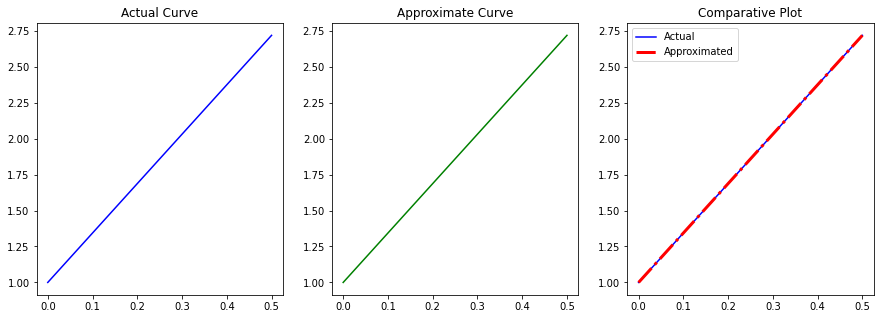

In [20]:
plotSpline(lambdified_equations,limits,X,Y)

## Priting Table

In [21]:
printMatrix(matrix,'Coefficients Matrix = ')

Coefficients Matrix =  =

  0.0000    0.0000    1.0000    5.2244   -3.5757    0.0000  
  1.0000    0.5000    2.7183    0.0000   -3.5757    0.0000  



## Printing Equations

for i in range(len(equations)):
    print(f'\nEquation {i+1} = ')
    sp.pprint(equations[i])